In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

### Loading Climate Regions Data

In [2]:
climate_regions = xr.open_dataset("raw/Beck_KG_V1_present_0p0083.gridName0320.nc")

### Loading Above Ground Biomass Data (Baseline)

In [3]:
agb_data = xr.open_dataset("preprocess/agb_avitabile_2010-2016_v3.nc")

In [4]:
print(climate_regions)

<xarray.Dataset>
Dimensions:          (latitude: 601, longitude: 1200)
Coordinates:
  * latitude         (latitude) float64 90.0 89.7 89.4 ... -89.4 -89.7 -90.0
  * longitude        (longitude) float64 0.0 0.3 0.6 0.9 ... 359.1 359.4 359.7
Data variables:
    climatic_region  (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-20T06:06:38 GRIB to CDM+CF via cfgrib-0....


## Before pre-processing

In [5]:
print(climate_regions.to_dataframe().describe())

       climatic_region
count    239128.000000
mean          3.229371
std           1.585448
min           1.000000
25%           2.000000
50%           3.073261
75%           5.000000
max           5.000000


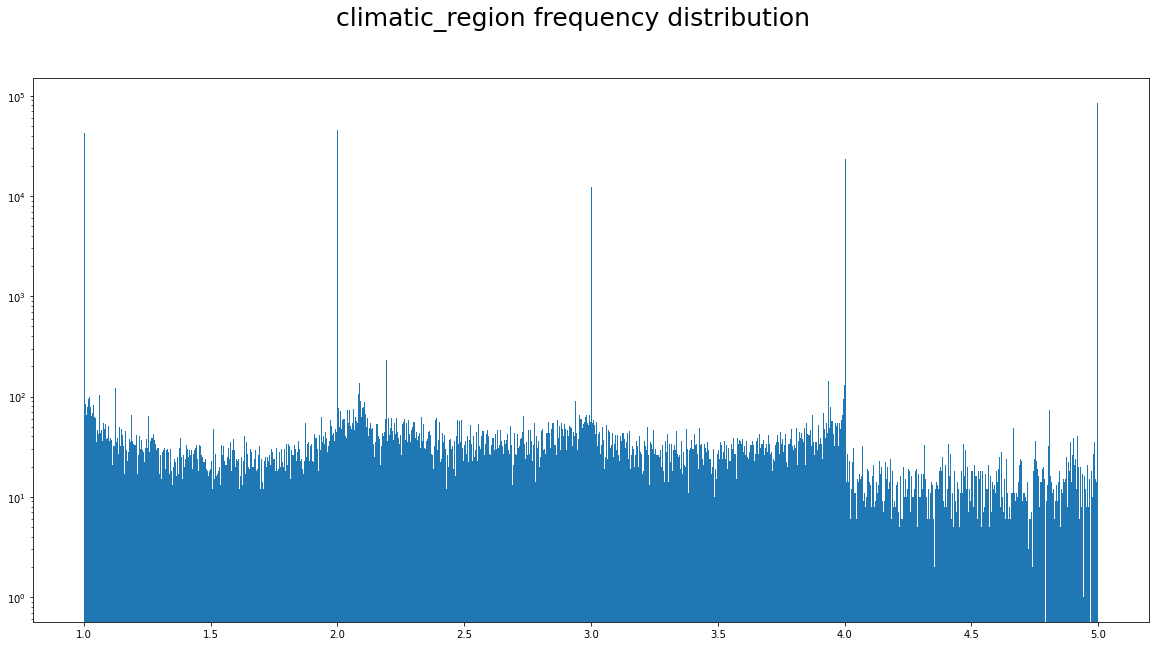

In [6]:
var_list =['climatic_region']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(climate_regions[var_list[i]].values.flatten(), bins=1000, cumulative=False, log=True)

### Re-Orienting longitude values

In [7]:
climate_regions = climate_regions.assign_coords({'latitude':climate_regions.latitude.values,'longitude':xr.where(climate_regions.longitude > 180, climate_regions.longitude - 360, climate_regions.longitude) })

### Interpolating Data to match resolution of AGB

In [8]:
climate_regions = climate_regions.interp({'latitude':agb_data.latitude.values,'longitude':agb_data.longitude.values})

### Rounding Values to the Nearest Integer

In [9]:
climate_regions.climatic_region.values = np.round(climate_regions.climatic_region.values)

In [10]:
print(climate_regions)

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    climatic_region  (latitude, longitude) float64 5.0 5.0 5.0 ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-20T06:06:38 GRIB to CDM+CF via cfgrib-0....


## After Pre-processing

In [11]:
print(climate_regions.to_dataframe().describe())

       climatic_region
count    326013.000000
mean          3.192652
std           1.593625
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           5.000000


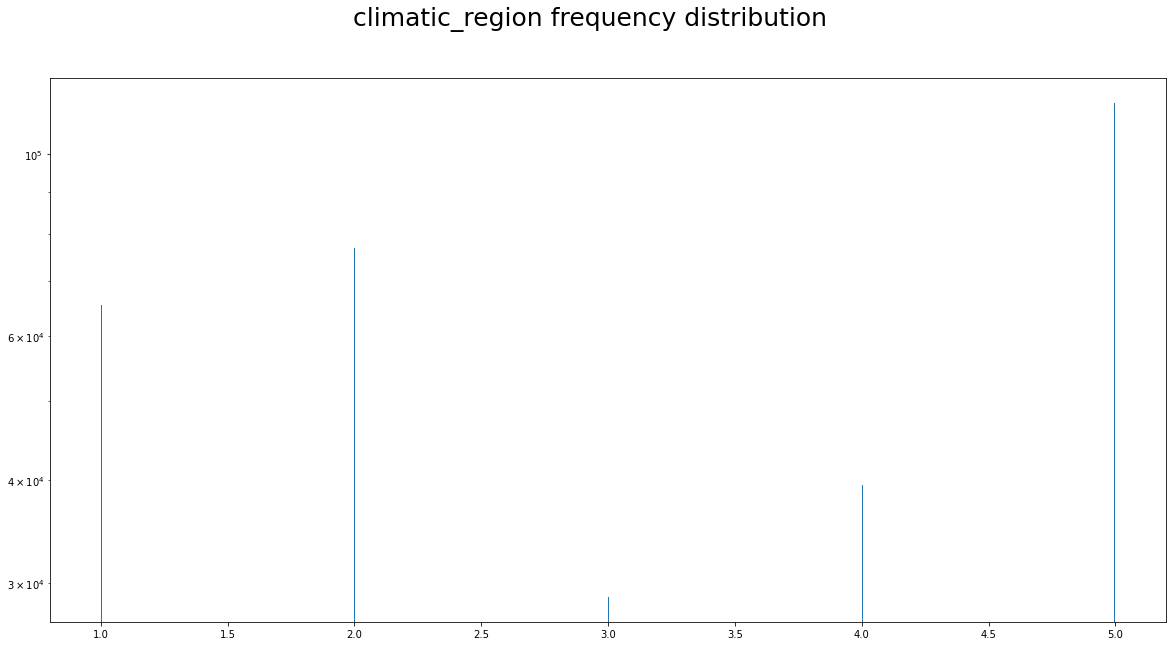

In [12]:
var_list =['climatic_region']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(climate_regions[var_list[i]].values.flatten(), bins=1000, cumulative=False, log=True)

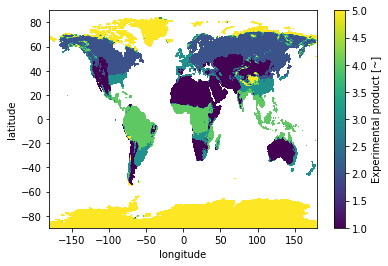

In [13]:
climate_regions.climatic_region.plot()

### Saving Data

In [14]:
climate_regions.to_netcdf("preprocess/climatic_regions_v3.nc")

### FIle Size in MB

In [15]:
round(os.stat("preprocess/climatic_regions_v3.nc").st_size / (1024 * 1024), 3)

7.93